In [4]:
# Read in the text files

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp


os.getcwd()

'C:\\Users\\Maylaka Mottarella\\OneDrive - UW\\CCDL\\CCDL Shared\\Expt\\PARC\\Subject Pool Pilot\\Tasks\\CardSort'

In [9]:
# Load in the individual text files of data 

# Specify the path to your folder containing text files
folder_path = 'CardSort_DataPull_11.17.23\experiment_data'

# Get a list of all text files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.txt')]

#print(files)

['WebTask_CardSort_v2.2023-10-27-2052.data.f6e3d15b-81f3-4e8a-8bc4-89205a6923a6.txt', 'WebTask_CardSort_v2.2023-10-28-0128.data.be8ab5de-ba36-46f2-b18a-e12f515b83f1.txt', 'WebTask_CardSort_v2.2023-10-31-2217.data.4ca6fc1a-b939-4099-bcda-28e3639cbf0a.txt', 'WebTask_CardSort_v2.2023-11-02-2041.data.e242b8f4-7410-43fa-b42c-ab54085e17a2.txt', 'WebTask_CardSort_v2.2023-11-04-2204.data.ef037217-c1aa-4dc3-9089-94fe1a96cb6b.txt', 'WebTask_CardSort_v2.2023-11-14-1955.data.82fba020-0562-4859-bd54-45500a2cc637.txt', 'WebTask_CardSort_v2.2023-11-15-0238.data.7b3657f9-49dd-429a-98cc-a2973fc72897.txt', 'WebTask_CardSort_v2.2023-11-16-2214.data.e7dcf814-e9f3-42a3-974d-ae9048925ade.txt']


In [38]:
#Convert the files to a df

# Initialize an empty dataframe to store the data
combined_df = pd.DataFrame()

# Define column names for the card sorting data
column_names = ['Block', 'Condition', 'CondName', 'TopType', 'TopStim', 'BtmType', 'BtmStim', 'Resp', 'Status', 'RT', 
               'SymRespCount', 'TxtRespCount', 'IncorrRespCount']

# Loop through each file and read it into a dataframe
for file in files:
    file_path = os.path.join(folder_path, file)
    
    # Assuming space is the delimiter, you can adjust it accordingly
    df = pd.read_csv(file_path, delimiter=' ', names = column_names)
    
        # Add a new column named 'FileName' with the name of the text file
    df['FileName'] = os.path.splitext(file)[0]
    
    # Append the dataframe to the combined dataframe
    combined_df = combined_df.append(df, ignore_index=True)


# Extract the substring after 'data.' and assign it to the 'Subject' column
combined_df['Subject'] = combined_df['FileName'].str.extract(r'data\.(.*)')


C:\Users\Maylaka Mottarella\AppData\Local\Temp\ipykernel_26656\2494649427.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\Maylaka Mottarella\AppData\Local\Temp\ipykernel_26656\2494649427.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\Maylaka Mottarella\AppData\Local\Temp\ipykernel_26656\2494649427.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\Maylaka Mottarella\AppData\Local\Temp\ipykernel_26656\2494649427.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

In [73]:
#Pull the counts of verbal vs visual cs responses into a new df

# Initialize an empty dataframe for the results
result_df = pd.DataFrame(columns=['Subject', 'SymRespCount', 'TxtRespCount', 'IncorrRespCount'])

# Group by 'Subject' and find the maximum values for each column
#max_values = combined_df.groupby('Subject')[['SymRespCount', 'TxtRespCount', 'IncorrRespCount']].max()
max_values = combined_df.groupby('Subject')[['SymRespCount', 'TxtRespCount', 'IncorrRespCount']].max().reset_index()


# Merge the max_values DataFrame with result_df on 'Subject'
result_df = result_df.append(max_values, ignore_index=True)


                                Subject SymRespCount TxtRespCount  \
0  4ca6fc1a-b939-4099-bcda-28e3639cbf0a           30           14   
1  7b3657f9-49dd-429a-98cc-a2973fc72897           43            5   
2  82fba020-0562-4859-bd54-45500a2cc637           17           30   
3  be8ab5de-ba36-46f2-b18a-e12f515b83f1            5           42   
4  e242b8f4-7410-43fa-b42c-ab54085e17a2           32           13   
5  e7dcf814-e9f3-42a3-974d-ae9048925ade            2           46   
6  ef037217-c1aa-4dc3-9089-94fe1a96cb6b           10           37   
7  f6e3d15b-81f3-4e8a-8bc4-89205a6923a6            1           46   

  IncorrRespCount  
0               4  
1               0  
2               1  
3               1  
4               3  
5               0  
6               1  
7               1  


C:\Users\Maylaka Mottarella\AppData\Local\Temp\ipykernel_26656\1661684299.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(max_values, ignore_index=True)


In [74]:
# Load in the survey data to get subject # and IRQ; Perform IRQ groupings

# Load the data.csv file
data_df = pd.read_csv(r'C:\Users\Maylaka Mottarella\OneDrive - UW\CCDL\CCDL Shared\Expt\PARC\Subject Pool Pilot\Tasks\CardSort\CardSort_DataPull_11.17.23\data.csv')

# IRQ Analysis

# Mapping of IRQ questions to categories
irq_visual_questions = ['IRQ_1', 'IRQ_3', 'IRQ_4', 'IRQ_8', 'IRQ_10', 'IRQ_11', 'IRQ_15', 'IRQ_16', 'IRQ_17', 'IRQ_19', 'IRQ_21', 'IRQ_25']
irq_verbal_questions = ['IRQ_2', 'IRQ_5', 'IRQ_6', 'IRQ_7', 'IRQ_9', 'IRQ_12', 'IRQ_13', 'IRQ_14', 'IRQ_18', 'IRQ_20', 'IRQ_22', 'IRQ_23', 'IRQ_24', 'IRQ_26']

# Reverse code values for IRQ_20 in irq_verbal_questions
reverse_code_mapping = {5: 1, 4: 2, 3: 3, 2: 4, 1: 5}
data_df['IRQ_20'] = data_df['IRQ_20'].map(reverse_code_mapping)

#print(data_df['IRQ_20'])

# Create new columns for IRQ_visual and IRQ_verbal in data_df
data_df['IRQ_visual'] = data_df[irq_visual_questions].mean(axis=1)
data_df['IRQ_verbal'] = data_df[irq_verbal_questions].mean(axis=1)

# Print or use the modified data_df with the new columns
#print(data_df[['participant', 'IRQ_visual', 'IRQ_verbal']])

0    5
1    4
2    5
3    4
4    4
5    5
6    4
7    4
Name: IRQ_20, dtype: int64
                                  participant  IRQ_visual  IRQ_verbal
0  s.e242b8f4-7410-43fa-b42c-ab54085e17a2.txt    3.666667    3.214286
1  s.ef037217-c1aa-4dc3-9089-94fe1a96cb6b.txt    3.250000    3.357143
2  s.e7dcf814-e9f3-42a3-974d-ae9048925ade.txt    4.666667    4.142857
3  s.82fba020-0562-4859-bd54-45500a2cc637.txt    3.250000    3.500000
4  s.4ca6fc1a-b939-4099-bcda-28e3639cbf0a.txt    3.083333    3.142857
5  s.be8ab5de-ba36-46f2-b18a-e12f515b83f1.txt    4.583333    4.642857
6  s.f6e3d15b-81f3-4e8a-8bc4-89205a6923a6.txt    3.833333    3.571429
7  s.7b3657f9-49dd-429a-98cc-a2973fc72897.txt    3.500000    3.714286


In [75]:
# Initialize a new column 'Expt_number' with NaN values
result_df['Expt_number'] = float('nan')
result_df['IRQ_visual'] = float('nan')
result_df['IRQ_verbal'] = float('nan')

# Iterate through each row in result_df
for index, row in result_df.iterrows():
    # Extract the unique part of the 'Subject' value for partial matching
    partial_match = row['Subject'].split('.')[0]
    
    # Perform partial string matching and get the corresponding 'subjnum_1' value
    match_row = data_df[data_df['participant'].str.contains(partial_match)]
    
    # If a match is found, update the 'Expt_number' column in result_df
    if not match_row.empty:
        result_df.at[index, 'Expt_number'] = match_row['subjnum_1'].values[0]
        result_df.at[index, 'IRQ_visual'] = match_row['IRQ_visual'].values[0]
        result_df.at[index, 'IRQ_verbal'] = match_row['IRQ_verbal'].values[0]



                                Subject SymRespCount TxtRespCount  \
0  4ca6fc1a-b939-4099-bcda-28e3639cbf0a           30           14   
1  7b3657f9-49dd-429a-98cc-a2973fc72897           43            5   
2  82fba020-0562-4859-bd54-45500a2cc637           17           30   
3  be8ab5de-ba36-46f2-b18a-e12f515b83f1            5           42   
4  e242b8f4-7410-43fa-b42c-ab54085e17a2           32           13   
5  e7dcf814-e9f3-42a3-974d-ae9048925ade            2           46   
6  ef037217-c1aa-4dc3-9089-94fe1a96cb6b           10           37   
7  f6e3d15b-81f3-4e8a-8bc4-89205a6923a6            1           46   

  IncorrRespCount  Expt_number  IRQ_visual  IRQ_verbal  
0               4       1603.0    3.083333    3.142857  
1               0       1606.0    3.500000    3.714286  
2               1       1605.0    3.250000    3.500000  
3               1       1601.0    4.583333    4.642857  
4               3       1604.0    3.666667    3.214286  
5               0       1607.0    4.

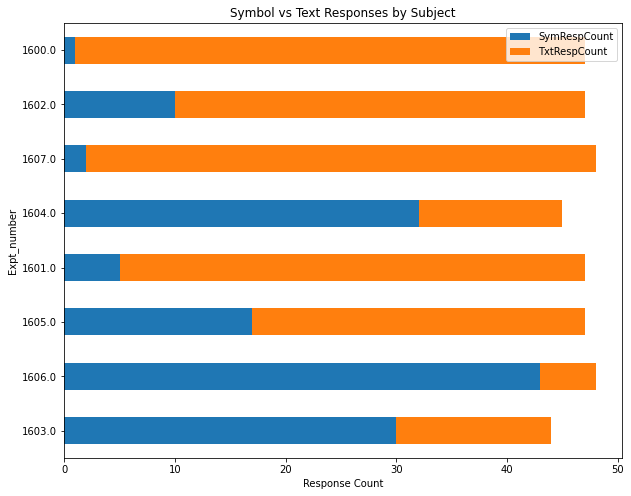

In [104]:
# create plot of card sorting responses 

# Filter relevant columns
response_df = result_df[['Expt_number', 'SymRespCount', 'TxtRespCount']]

# Set Subject as the index
response_df.set_index('Expt_number', inplace=True)

# Plot horizontal bar chart
ax = response_df.plot(kind='barh', stacked=True, figsize=(10, 8))

# Set plot labels and title
plt.xlabel('Response Count')
plt.title('Symbol vs Text Responses by Subject')

# Show the plot
plt.show()

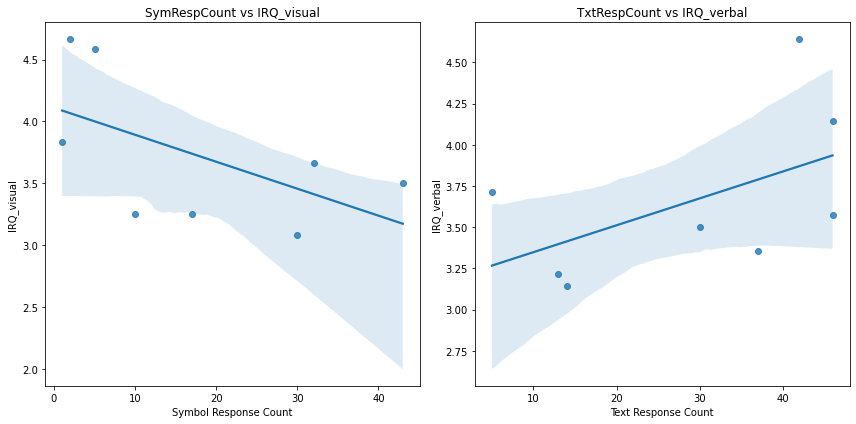

In [95]:
#Plot the IRQ dimensions by the card sorting dimensions - they don't really map on 
# Convert columns to numeric
result_df['SymRespCount'] = pd.to_numeric(result_df['SymRespCount'], errors='coerce')
result_df['TxtRespCount'] = pd.to_numeric(result_df['TxtRespCount'], errors='coerce')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for SymRespCount vs IRQ_visual
sns.regplot(x="SymRespCount", y="IRQ_visual", data=result_df, ax=axes[0])
axes[0].set_title('SymRespCount vs IRQ_visual')
axes[0].set_xlabel('Symbol Response Count')
axes[0].set_ylabel('IRQ_visual')

# Plot for TxtRespCount vs IRQ_verbal
sns.regplot(x="TxtRespCount", y="IRQ_verbal", data=result_df, ax=axes[1])
axes[1].set_title('TxtRespCount vs IRQ_verbal')
axes[1].set_xlabel('Text Response Count')
axes[1].set_ylabel('IRQ_verbal')

# Adjust layout
plt.tight_layout()


# Show the plots
plt.show()


              IRQ_verbal  IRQ_visual  SymRespCount  TxtRespCount  \
IRQ_verbal      1.000000    0.866696     -0.492010      0.526527   
IRQ_visual      0.866696    1.000000     -0.568668      0.589147   
SymRespCount   -0.492010   -0.568668      1.000000     -0.996773   
TxtRespCount    0.526527    0.589147     -0.996773      1.000000   
IRQ_pyvisual    0.204687    0.106479     -0.230841      0.252142   
IRQ_pyverbal   -0.103114   -0.264115     -0.074992      0.081984   

              IRQ_pyvisual  IRQ_pyverbal  
IRQ_verbal        0.204687     -0.103114  
IRQ_visual        0.106479     -0.264115  
SymRespCount     -0.230841     -0.074992  
TxtRespCount      0.252142      0.081984  
IRQ_pyvisual      1.000000      0.375823  
IRQ_pyverbal      0.375823      1.000000  


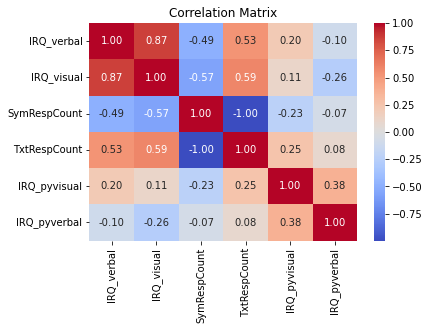

In [123]:
# Looking at the IRQ Python questions then compute correlations and heatmaps for all measures

# IRQ Python Specific Questions
# Calculate the average of IRQ_10 and IRQ_17 for IRQ_pyvisual
result_df['IRQ_pyvisual'] = data_df[['IRQ_10', 'IRQ_17']].mean(axis=1)

# Calculate the average of IRQ_5 and IRQ_23 for IRQ_pyverbal
result_df['IRQ_pyverbal'] = data_df[['IRQ_5', 'IRQ_23']].mean(axis=1)

# Assuming you have numeric columns
numeric_columns = ['IRQ_verbal', 'IRQ_visual', 'SymRespCount', 'TxtRespCount', 'IRQ_pyvisual', 'IRQ_pyverbal']

# Calculate correlation matrix
correlation_matrix = result_df[numeric_columns].corr()

# Display correlation matrix as a table
print(correlation_matrix)

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [120]:
# Use self resport data to assign strategy values based on Expt_number
result_df['Strategy'] = 'neutral'
result_df.loc[result_df['Expt_number'].isin([1604, 1603, 1606]), 'Strategy'] = 'visual'
result_df.loc[result_df['Expt_number'].isin([1607, 1601, 1600]), 'Strategy'] = 'verbal'

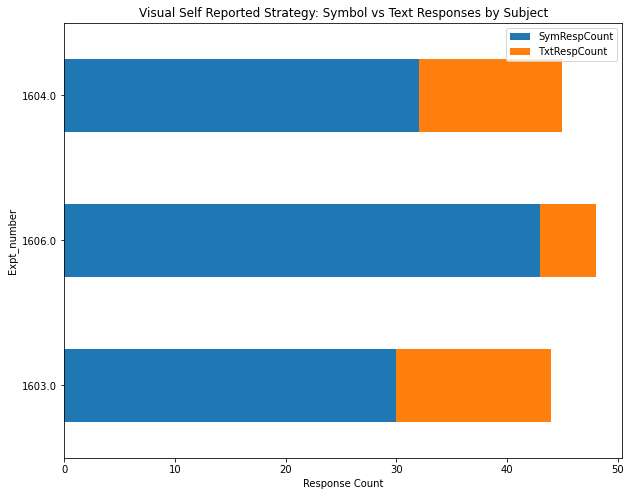

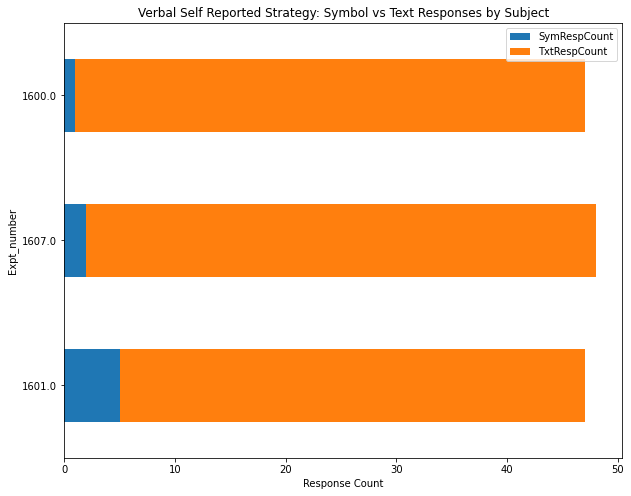

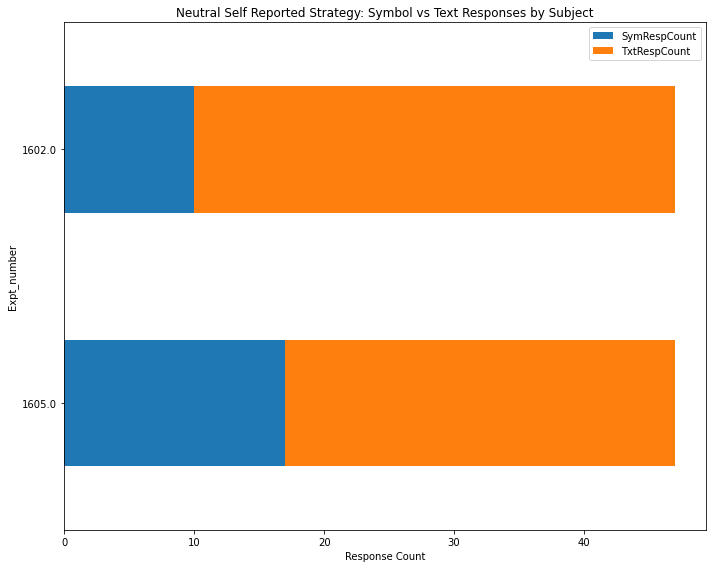

In [124]:
#Plot CS data using the self reported strategy - maps on well

# Assuming 'strategy' is a column in your result_df DataFrame
visual_df = result_df[result_df['Strategy'] == 'visual']
verbal_df = result_df[result_df['Strategy'] == 'verbal']
neutral_df = result_df[result_df['Strategy'] == 'neutral']

# Filter relevant columns
response_df = visual_df[['Expt_number', 'SymRespCount', 'TxtRespCount']]

# Set Subject as the index
response_df.set_index('Expt_number', inplace=True)

# Plot horizontal bar chart
ax1 = response_df.plot(kind='barh', stacked=True, figsize=(10, 8))

# Set plot labels and title
plt.xlabel('Response Count')
plt.title('Visual Self Reported Strategy: Symbol vs Text Responses by Subject')

# Show the plot
#plt.show()

# Filter relevant columns
responsev_df = verbal_df[['Expt_number', 'SymRespCount', 'TxtRespCount']]

# Set Subject as the index
responsev_df.set_index('Expt_number', inplace=True)

# Plot horizontal bar chart
ax2 = responsev_df.plot(kind='barh', stacked=True, figsize=(10, 8))

# Set plot labels and title
plt.xlabel('Response Count')
plt.title('Verbal Self Reported Strategy: Symbol vs Text Responses by Subject')

# Show the plot
#plt.show()

# Filter relevant columns
responsen_df = neutral_df[['Expt_number', 'SymRespCount', 'TxtRespCount']]

# Set Subject as the index
responsen_df.set_index('Expt_number', inplace=True)

# Plot horizontal bar chart
ax3 = responsen_df.plot(kind='barh', stacked=True, figsize=(10, 8))

# Set plot labels and title
plt.xlabel('Response Count')
plt.title('Neutral Self Reported Strategy: Symbol vs Text Responses by Subject')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()